<a href="https://colab.research.google.com/github/SantosCristiano/artificial-intelligence-python/blob/main/02_neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow 1

## Aula 13 - Tensor Flow - Redes Neurais - Regressão Exemplo 02

### Importando o tensorflow e o numpy

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

A célula abaixo é só para a gente reforçar o que faz cada parâmetro do linspace

(-0.2, 2.0)

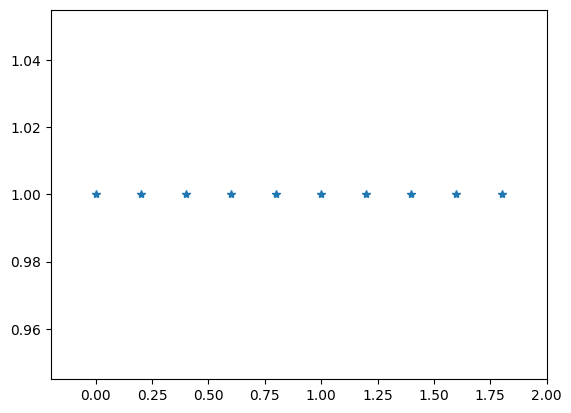

In [3]:
import numpy as np
import pylab as p

# inicio = 0
# fim = 2
# número de amostras geradas = 10
x1 = np.linspace(0, 2, 10, endpoint = False)
y1 = np.ones(10)

p.plot(x1, y1, '*')
p.xlim(-0.2, 2.0)

In [4]:
x_data = np.linspace(0.0, 10.0, 1000000)

In [5]:
noise = np.random.randn(len(x_data))

In [6]:
print(x_data)

[0.000000e+00 1.000001e-05 2.000002e-05 ... 9.999980e+00 9.999990e+00
 1.000000e+01]


In [7]:
print(noise)

[ 1.88268593  0.16674586  0.78888583 ...  0.13706664  2.31823353
 -2.0881492 ]


In [8]:
print(len(noise))

1000000


<strong>y = mx + b</strong>
<br />
<strong>m = 0.5</strong><br />
<strong>b = 5</strong>

O valor de <strong>interceptação</strong> é <strong>5</strong> e adicionamos algum ruído a ele, portanto, os dados não estão em uma linha perfeitamente reta.

In [9]:
y_true = (0.5 * x_data) + 5 + noise

<h2>Criando os dados</h2>

Para isso vamos usar o Pandas para juntar algumas coisas e também para facilitar a plotagem dos dados

In [10]:
x_df = pd.DataFrame(data = x_data, columns = ['X Data'])

In [11]:
y_df = pd.DataFrame(data = y_true, columns = ['Y'])

In [12]:
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [13]:
my_data = pd.concat([x_df, y_df], axis = 1)

In [14]:
print(my_data.head())

    X Data         Y
0  0.00000  6.882686
1  0.00001  5.166751
2  0.00002  5.788896
3  0.00003  5.290435
4  0.00004  6.054773


In [15]:
my_data.sample(n = 5)

,X Data,Y
951457,9.514580,8.603456
755974,7.559748,8.055785
331612,3.316123,5.589269
617001,6.170016,8.879508
651307,6.513077,7.302505


# <h2>A distribuição mostra visualmente a tendência linear</h2>

<Axes: xlabel='X Data', ylabel='Y'>

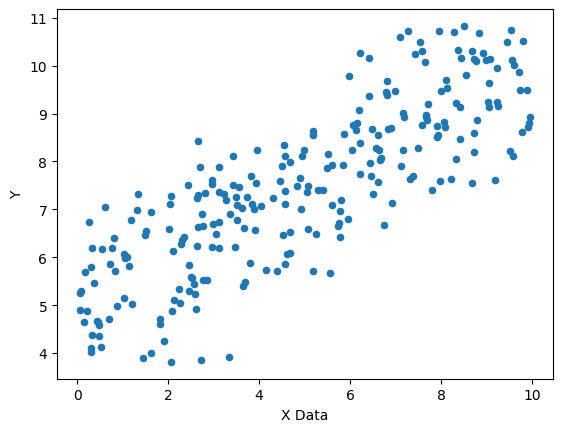

In [16]:
my_data.sample(n = 250).plot(kind = 'scatter', x = 'X Data', y = "Y")

Para alimentar a rede neural com dados massivos, temos que separar em lotes e enviar aos poucos para o processamento no treinamento da rede.

In [17]:
batch_size = 8

<h2>Variáveis</h2>

O comando abaixo é só pra gerar dois números aleatórios, poderíamos escolher da nossa cabeça mesmo

In [18]:
np.random.randn(2)

array([ 1.00009093, -0.69092259])

O <strong>m</strong> é a inclinação da reta e o <strong>b</strong> é a interceptação

In [19]:
m = tf.Variable(0.38)

In [20]:
b = tf.Variable(0.46)

Novamente, o que queremos é que a rede descubra qual o <strong>m</strong> e o <strong>b</strong> que na equação linear <strong>y = mx + b</strong> melhor explique a distribuição que criamos artificialmente.

<h2>Placeholder</h2>

In [21]:
xph = tf.placeholder(tf.float32, [batch_size])

In [22]:
yph = tf.placeholder(tf.float32, [batch_size])

<h2>Grafo - Define as operações<h2>

In [23]:
y_model = m * xph + b

<h2>Função de perda</h2>

In [24]:
error = tf.reduce_sum(tf.square(yph - y_model)) #y_model tem os valores previstos

<h2>Otimização</h2>

In [27]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)

In [28]:
train = optimizer.minimize(error)

<h2>Inicializando as variáveis</h2>

In [29]:
init = tf.global_variables_initializer()

<h2>Sessão</h2>

A rede será alimentada com 1000 lotes de dados de 8 em 8, onde em cada lote temos pontos de dados correspondentes, <strong>x</strong> pontos de dados e o rótulo <strong>y</strong>, já que é um aprendizado supervisionado.

A rede será treinada com 8 mil pontos de dados: <strong>batches * batch_size = 8000</strong>

In [44]:
with tf.Session() as sess:
  sess.run(init)
  batches = 100000
  for i in range(batches):
    rand_ind = np.random.randint(len(x_data), size = batch_size)

    feed = {xph: x_data[rand_ind], yph: y_true[rand_ind] }

    sess.run(train, feed_dict = feed)

  model_m, model_b = sess.run([m, b])

In [45]:
rand_ind = np.random.randint(len(x_data), size = batch_size)

In [46]:
rand_ind

array([120982, 503799, 422169, 319190, 753297, 120098, 624349, 708864])

O <strong>model_m</strong> deve ser próximo de <strong>0.5</strong> e o <strong>model_b</strong> perto de <strong>5.0</strong>.<br />
Porque lá no começo do código definimos:
<strong>y_true = (0.5 * x_data) + 5 + noise</strong>

In [47]:
print(model_m)

0.49492997


In [48]:
print(model_b)

4.9666595


O <strong>y_hat</strong> são os pontos previsto pelo modelo, que será plotado logo abaixo em uma reta vermelha

In [49]:
y_hat = x_data * model_m + model_b

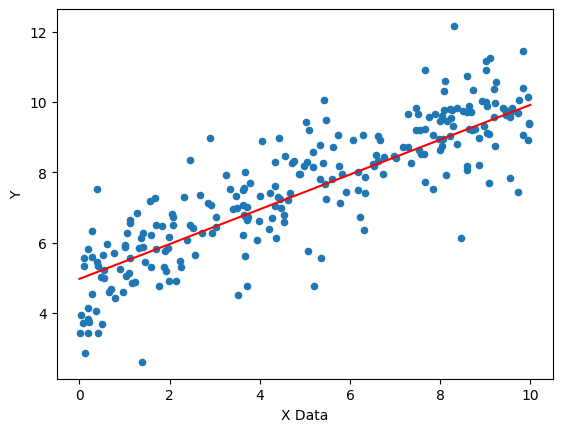

In [50]:
my_data.sample(250).plot(kind = 'scatter', x = 'X Data', y = 'Y')
plt.plot(x_data, y_hat, 'r')

<h2>Fim do exemplo 02 de Regressão Linear com redes neurais</h2>